**Prática de Histogramas**

1)
- Produza a imagem ‘negativa’ do arquivo ‘im_cells.png’
- Com a imagem negativa, produza a imagem original novamente.
- Mostre lado a lado a imagem original e a negativa. Em qual deles os objetos presentes na imagem são melhor percebidos? Justifique.
- Aplique a imagem uma função logarítmica.


Saving im_cells.png to im_cells (17).png


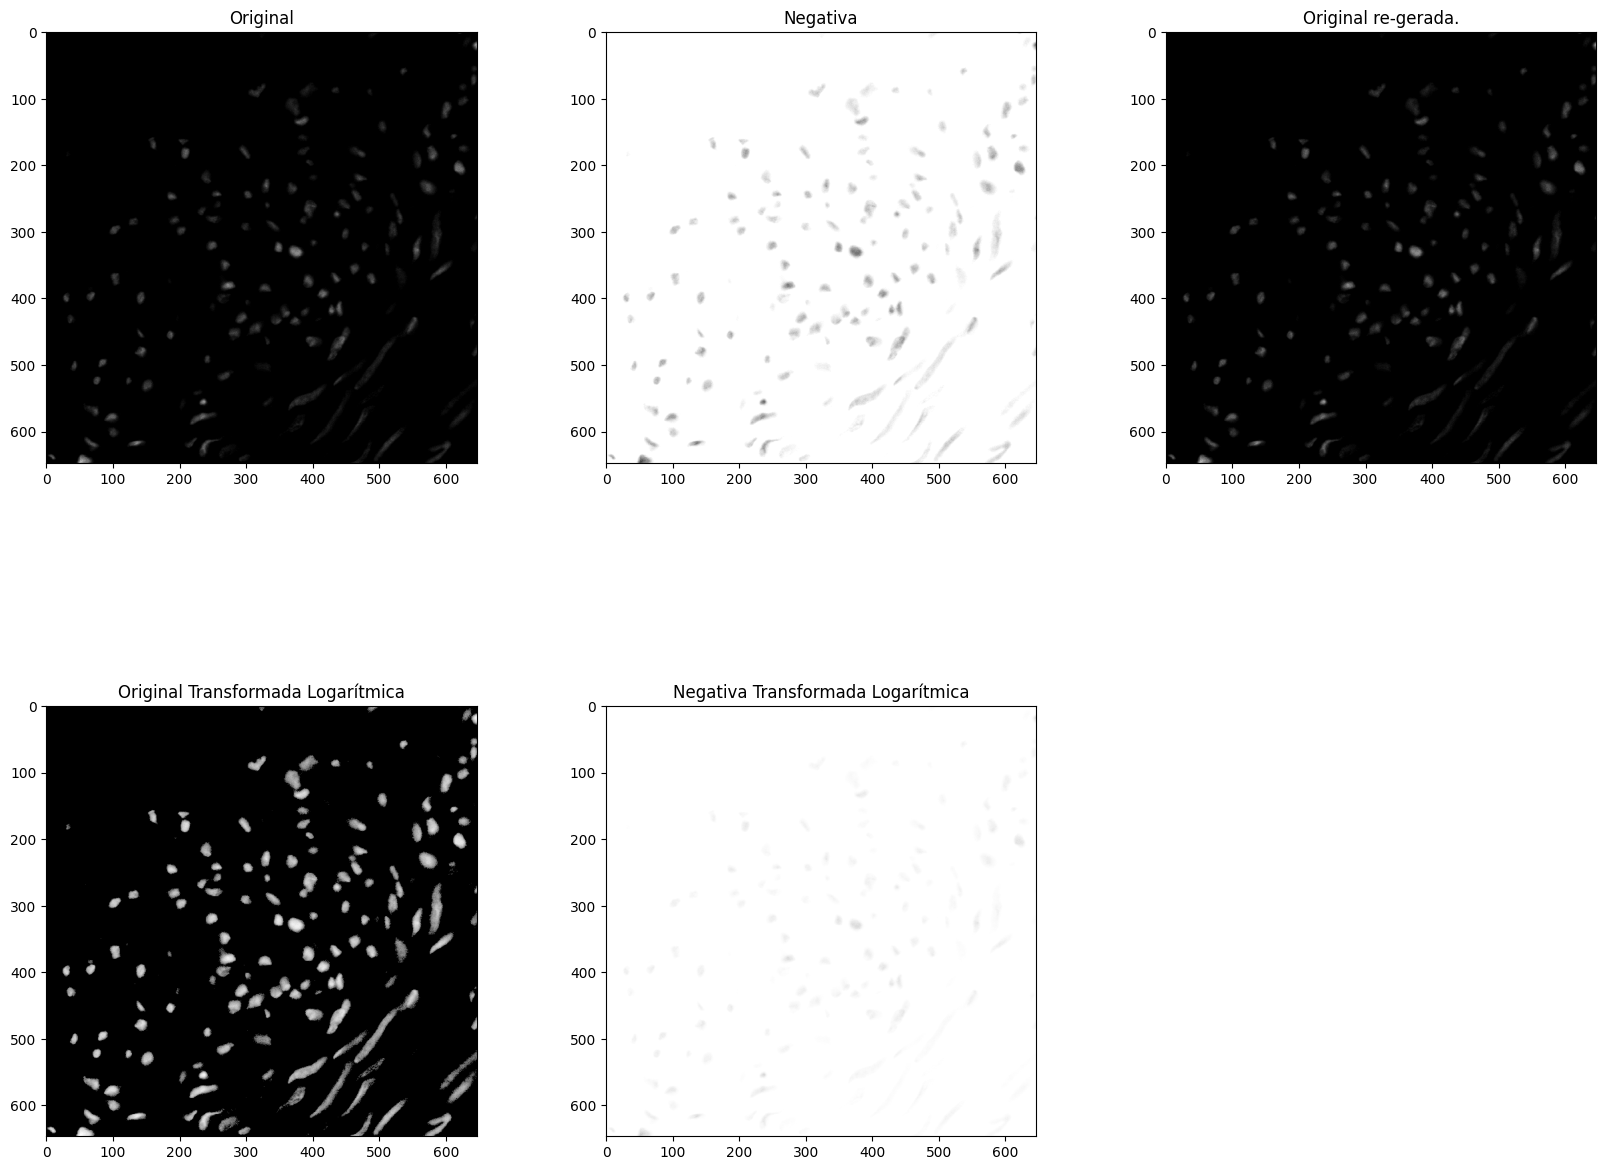

Na imagem original é mais fácil perceber os objetos presentes. Isso ocorre pois há maior contraste entre os objetos e o fundo na imagem original do que na imagem negativa.

In [36]:

from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display, Markdown

uploaded = files.upload()

file_name = next(iter(uploaded))


img = Image.open(f"/content/{file_name}")
img_array = np.array(img)


negative_img = 255 - img_array
regenerated_img = 255 - negative_img

# Aplicar transformação logarítmica à imagem original
c = 255 / np.log1p(np.max(img_array))  # Constante de escala para a imagem original
transformada_original = c * np.log1p(img_array)
transformada_original = np.clip(transformada_original, 0, 255).astype(np.uint8)
final_original  = Image.fromarray(transformada_original)

# Aplicar transformação logarítmica à imagem negativa
c_neg = 255 / np.log1p(np.max(negative_img))  # Constante de escala para a imagem negativa
transformada_negativa = c_neg * np.log1p(negative_img)
transformada_negativa = np.clip(transformada_negativa, 0, 255).astype(np.uint8)
final_negativa = Image.fromarray(transformada_negativa)


plt.figure(figsize=(20, 15))
plt.subplot(2, 3, 1)
plt.title('Original')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 3, 2)
plt.title('Negativa')
plt.imshow(negative_img, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 3, 3)
plt.title('Original re-gerada.')
plt.imshow(regenerated_img, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 3, 4)
plt.title('Original Transformada Logarítmica')
plt.imshow(final_original, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 3, 5)
plt.title('Negativa Transformada Logarítmica')
plt.imshow(final_negativa, cmap='gray', vmin=0, vmax=255)

plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

display(Markdown("Na imagem original é mais fácil perceber os objetos presentes. Isso ocorre pois há maior contraste entre os objetos e o fundo na imagem original do que na imagem negativa."))

2)
- Abra a imagem 'pout.tif' e mostre seu histograma.
- Equalize a imagem anterior e mostre novamente seu histograma. Mostra a curva de transformação (consulte https://www.mathworks.com/help/images/histogram-equalization.html)
(procurar função OpenCV)



3) *Implemente* o algoritmo de equalização de histograma e aplique a imagem ‘imcells.png’. Use o mínimos de laços for - tente realizar operações diretas com matrizes e vetores do numpy
- Aplique o mesmo algortimo 2x na mesma imagem e compare os resultados

Saving im_cells.png to im_cells (15).png


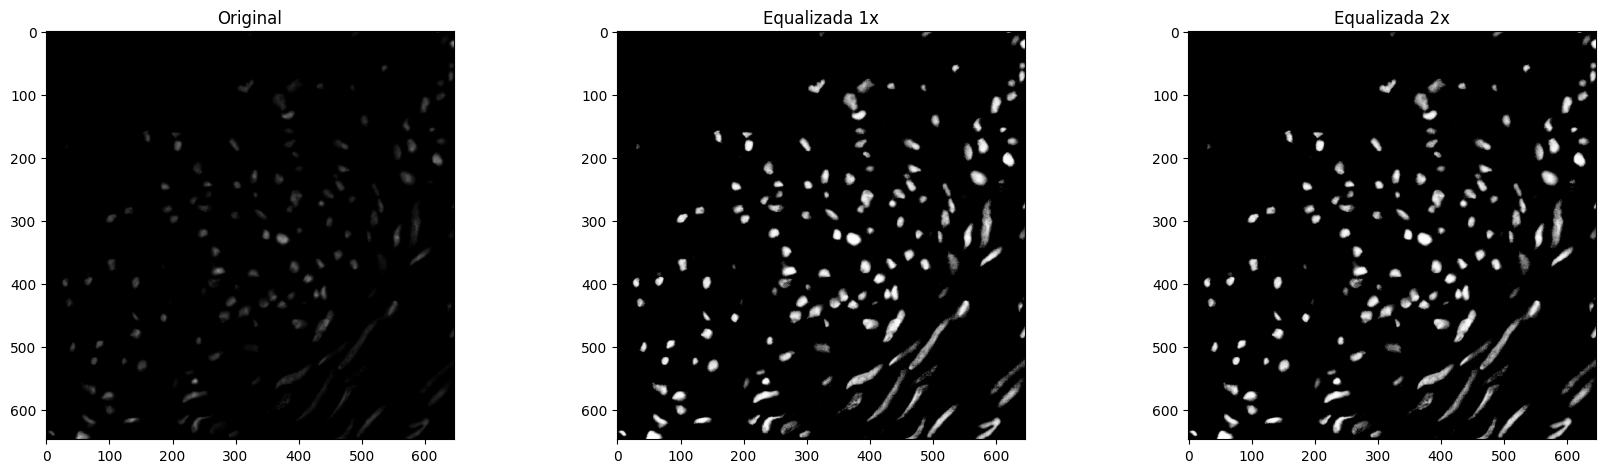

In [34]:
from google.colab import files
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image


uploaded = files.upload()

file_name = next(iter(uploaded))
img = Image.open(f"/content/{file_name}").convert('L')
img_array = np.array(img)

# Função para equalizar histograma
def equalizar_histograma(img):
    # 1. Calcular o histograma
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])

    # 2. Calcular a função de distribuição cumulativa (CDF)
    cdf = hist.cumsum()
    cdf_normalizada = cdf * hist.max() / cdf.max()  # Normalizar

    # 3. Usar a CDF para remapear os valores de intensidade
    cdf_m = np.ma.masked_equal(cdf, 0)  # Ignorar valores 0
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())  # Equalizar
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')  # Preencher 0s com valores ajustados

    # 4. Mapear a imagem original usando a CDF
    img_equalizada = cdf[img]
    return img_equalizada

# equalização 1 e 2x
equalizada_1x = equalizar_histograma(img_array)

equalizada_2x = equalizar_histograma(equalizada_1x)

plt.figure(figsize=(20, 15))

# original
plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(img_array, cmap='gray', vmin=0, vmax=255)

# equalizada 1x
plt.subplot(1, 3, 2)
plt.title('Equalizada 1x')
plt.imshow(equalizada_1x, cmap='gray', vmin=0, vmax=255)

# equalizada 2x
plt.subplot(1, 3, 3)
plt.title('Equalizada 2x')
plt.imshow(equalizada_2x, cmap='gray', vmin=0, vmax=255)

plt.subplots_adjust(wspace=0.4)
plt.show()